In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sqlite3

In [2]:
# connect to database

conn = sqlite3.connect('../data/prod_sample.db')

In [3]:
# identify tables in database

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('stock_description',), ('online_retail_history',)]


In [4]:
# write sql query to select online retail history data

query = """select *
from online_retail_history
where price > 0
"""

online_trans = pd.read_sql(query, conn)

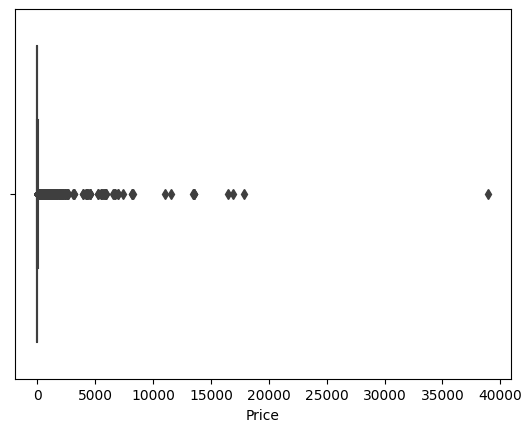

In [5]:
sns.boxplot(x=online_trans.Price);

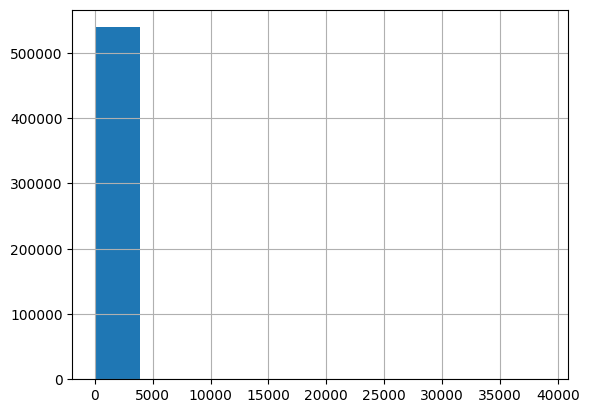

In [6]:
online_trans.Price.hist();

In [7]:
online_trans.Price.describe()

count    539393.000000
mean          4.673672
std          94.614636
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: Price, dtype: float64

In [8]:
q1 = np.percentile(online_trans.Price, 25)
q3 = np.percentile(online_trans.Price, 75)

In [9]:
iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

print("The lower bound is:", lb)
print("The upper bound is:", ub)

The lower bound is: -3.0700000000000003
The upper bound is: 8.45


In [10]:
iqr = 4.13 - 1.25
lb = 1.25 - 1.5 * iqr
ub = 4.13 + 1.5 * iqr

print("The lower bound is:", lb)
print("The upper bound is:", ub)


The lower bound is: -3.0700000000000003
The upper bound is: 8.45


In [11]:
# Only selecting data between the price range 0 and 8.50
# Values above 8.45 are considered outliers 
# Would expect data data not to have negative values

query = """select *
from online_retail_history
where price > 0 and price < 8.50
"""

online_trans = pd.read_sql(query, conn)

In [12]:
online_trans.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,u1785,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom


In [13]:
type(online_trans)

pandas.core.frame.DataFrame

In [14]:
online_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500797 entries, 0 to 500796
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      500797 non-null  object 
 1   StockCode    500797 non-null  object 
 2   Quantity     500797 non-null  int64  
 3   InvoiceDate  500797 non-null  object 
 4   Price        500797 non-null  float64
 5   CustomerID   382701 non-null  object 
 6   Country      500797 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 26.7+ MB


In [15]:
online_trans.shape

(500797, 7)

In [16]:
# get descriptive statistics
online_trans.Price.describe()

count    500797.000000
mean          2.547406
std           1.930935
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max           8.490000
Name: Price, dtype: float64

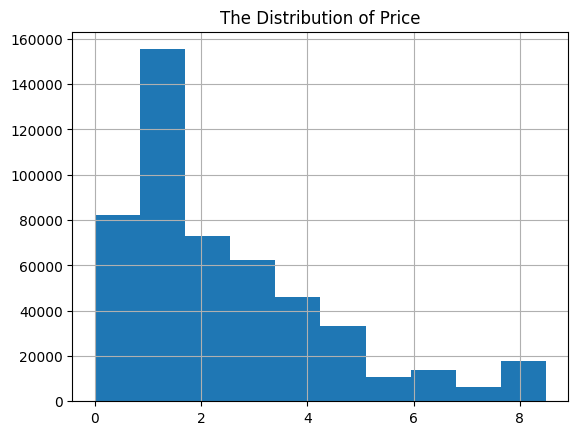

In [17]:
# visualising price

online_trans.Price.hist()
plt.title("The Distribution of Price");

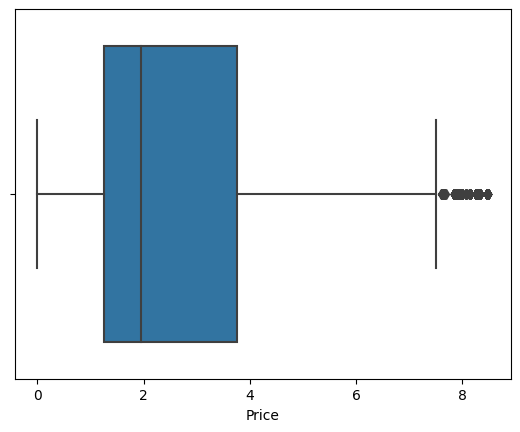

In [18]:
sns.boxplot(x=online_trans.Price);

In [19]:
# way to calculate outliers

q1 = np.percentile(online_trans.Price, 25)
q3 = np.percentile(online_trans.Price, 75)

iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

print("The lower bound is:", lb)
print("The upper bound is:", ub)

The lower bound is: -2.5
The upper bound is: 7.5


In [20]:
online_trans.Price.describe()

count    500797.000000
mean          2.547406
std           1.930935
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max           8.490000
Name: Price, dtype: float64

In [21]:
# way to calculate outliers

q1 = np.percentile(online_trans.Quantity, 25)
q3 = np.percentile(online_trans.Quantity, 75)

iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

print("The lower bound is:", lb)
print("The upper bound is:", ub)

The lower bound is: -15.5
The upper bound is: 28.5


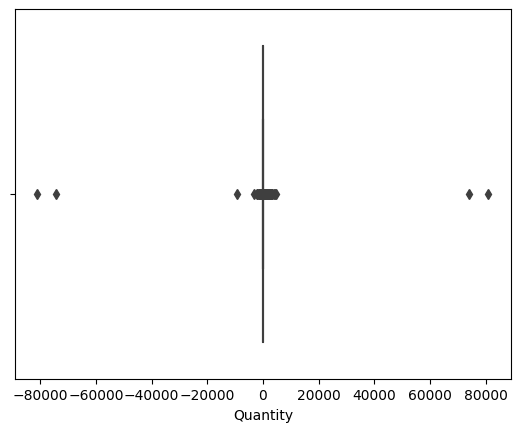

In [22]:
sns.boxplot(x=online_trans.Quantity);

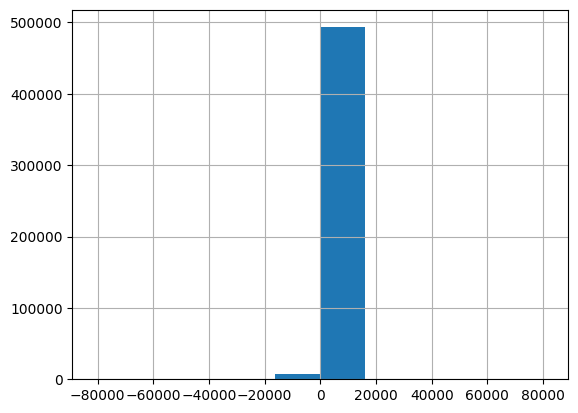

In [23]:
online_trans.Quantity.hist();

In [24]:
# Only selecting data between the price range 0 and 8.50
# Values above 8.45 are considered outliers 
# Would expect data data not to have negative values
# remove invoices where quantity less than 0 and greater than the upper bound value 29

query = """select *
from online_retail_history
where price > 0 and price < 8.50
 and quantity > 0 and quantity < 29
"""

online_trans = pd.read_sql(query, conn)

In [25]:
online_trans.shape

(466545, 7)

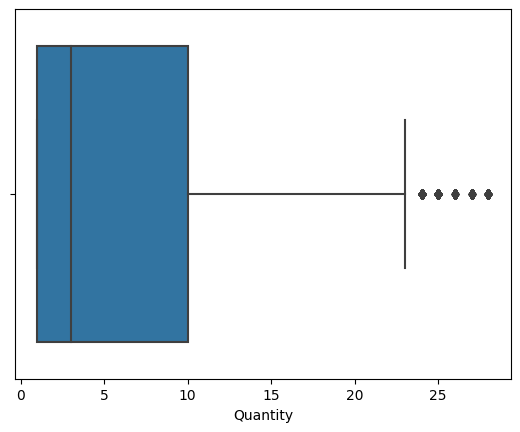

In [26]:
sns.boxplot(x=online_trans.Quantity);

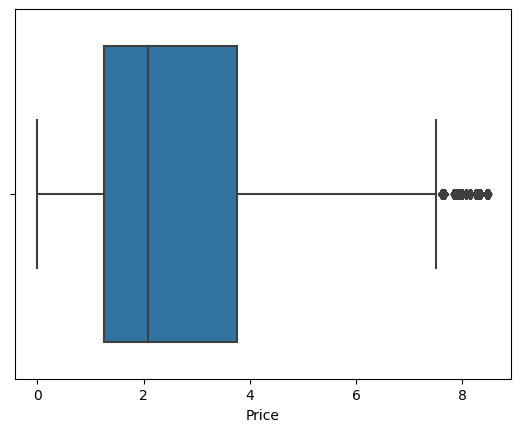

In [27]:
sns.boxplot(x=online_trans.Price);

In [28]:
online_trans.describe()

,Quantity,Price
count,466545.000000,466545.000000
mean,6.146183,2.606442
std,6.402073,1.943891
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,3.750000
max,28.000000,8.490000


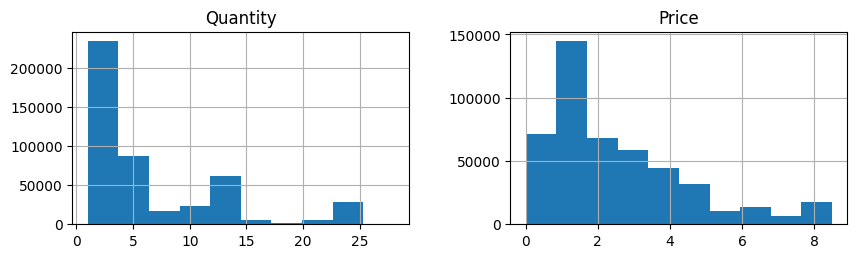

In [29]:
online_trans.hist(figsize=(10,2.5));

In [30]:
online_trans.corr(numeric_only=True)

,Quantity,Price
Quantity,1.000000,-0.347866
Price,-0.347866,1.000000


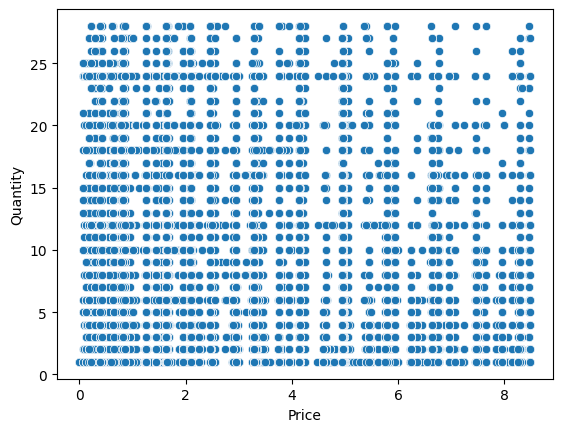

In [31]:
sns.scatterplot(data=online_trans, x="Price", y="Quantity");

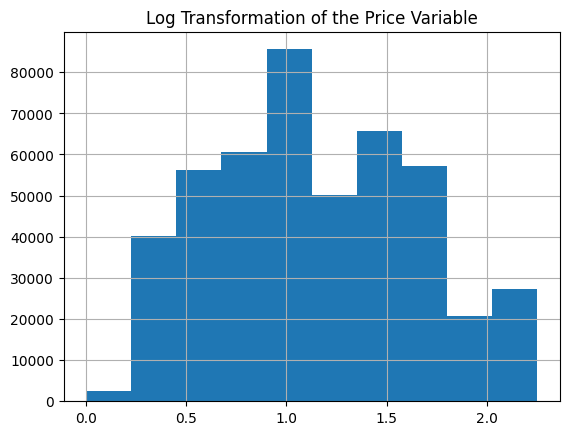

In [32]:
np.log(online_trans.Price+1).hist()
plt.title("Log Transformation of the Price Variable");

In [33]:
online_trans.Price

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
466540    0.85
466541    2.10
466542    4.15
466543    4.15
466544    4.95
Name: Price, Length: 466545, dtype: float64

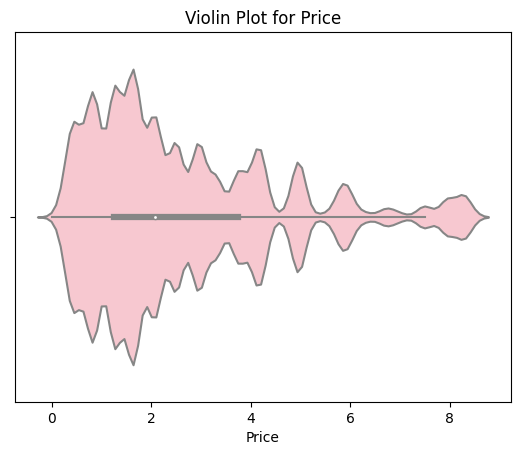

In [34]:
sns.violinplot(x=online_trans.Price, color="pink")
plt.title("Violin Plot for Price");

In [35]:
online_trans.Country

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
466540            France
466541            France
466542            France
466543            France
466544            France
Name: Country, Length: 466545, dtype: object

In [36]:
online_trans.Country.value_counts()

Country
United Kingdom          430982
Germany                   7682
France                    7207
EIRE                      6278
Spain                     2128
Belgium                   1695
Switzerland               1640
Portugal                  1334
Norway                     804
Netherlands                653
Italy                      645
Channel Islands            620
Australia                  544
Finland                    543
Cyprus                     512
Unspecified                416
Austria                    352
Denmark                    302
Poland                     268
Sweden                     253
Israel                     245
Hong Kong                  209
Iceland                    167
USA                        163
Singapore                  155
Greece                     129
Canada                     126
Japan                      110
Malta                       93
United Arab Emirates        59
European Community          51
RSA                         48


In [37]:
# get the number of unique countries

len(online_trans.Country.unique())

38

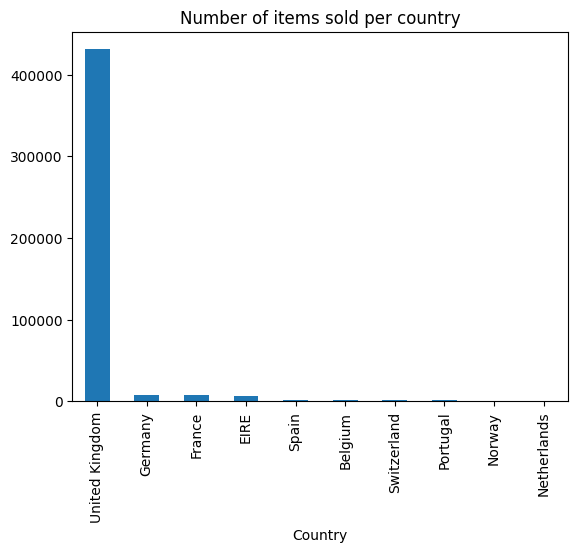

In [38]:
online_trans.Country.value_counts().nlargest(10).plot(kind="bar")
plt.title("Number of items sold per country");